In [0]:
import torch
import torchvision
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = False

In [0]:
import torchvision.datasets

In [0]:
MNIST_train = torchvision.datasets.MNIST('/', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('/', download=True, train=False)

In [34]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels

X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [35]:
len(y_train), len(y_test)

(60000, 10000)

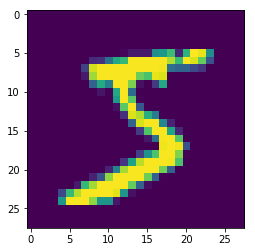

tensor(5)


In [36]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [37]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [0]:
X_train = X_train.unsqueeze(1).float()   # добавляет батч
X_test = X_test.unsqueeze(1).float()

In [39]:
X_train.shape, X_test.shape

(torch.Size([60000, 1, 28, 28]), torch.Size([10000, 1, 28, 28]))

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
    self.act2 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv3 = torch.nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5)
    self.act3 = torch.nn.Tanh()
    
    self.fc1 = torch.nn.Linear(120, 84)
    self.act4 = torch.nn.Tanh()
    
    self.fc2 = torch.nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
    
    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)
    
    x = self.conv3(x)
    x = self.act3(x)
    
    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    
    x = self.fc1(x)
    x = self.act4(x)
    x = self.fc2(x)
    
    return x
  
le_net5 = LeNet5()
    

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
le_net5 = le_net5.to(device)

In [0]:
learning_rate = 0.001
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(le_net5.parameters(), lr=learning_rate)

In [43]:
batch_size = 100

train_loss_history = []
train_accuracy_history = []

test_loss_history = []
test_accuracy_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(1000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    
    batch_indices = order[start_index: start_index+batch_size]
    
    X_batch = X_train[batch_indices].to(device)
    y_batch = y_train[batch_indices].to(device)
    
    y_pred = le_net5.forward(X_batch)
    
    loss_value = loss(y_pred, y_batch)
    loss_value.backward()
    
    optimizer.step()
    
  y_pred_train = le_net5.forward(X_train.to(device))
  train_loss_history.append(loss(y_pred_train, y_train.to(device)).data.cpu())
  train_accuracy_history.append(
      (y_pred_train.argmax(dim=1) == y_train.to(device)).float().mean().data.cpu())
  
  y_pred_test = le_net5.forward(X_test)
  test_loss_history.append(loss(y_pred_test, y_test).data.cpu())
  test_accuracy_history.append(
      (y_pred_test.argmax(dim=1) == y_test).float().mean().data.cpu())
  
  if epoch % 100 == 0:
    print(test_loss_history[epoch], test_accuracy_history[epoch])
  
  
    

tensor(0.0775) tensor(0.9759)
tensor(0.0492) tensor(0.9900)
tensor(0.0656) tensor(0.9885)
tensor(0.0752) tensor(0.9903)
tensor(0.0841) tensor(0.9878)
tensor(0.0704) tensor(0.9918)
tensor(0.0826) tensor(0.9888)
tensor(0.0737) tensor(0.9895)
tensor(0.1080) tensor(0.9880)
tensor(0.0861) tensor(0.9887)


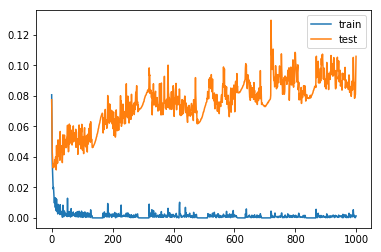

In [47]:
plt.plot(train_loss_history, label='train')
plt.plot(test_loss_history, label='test')
plt.legend()

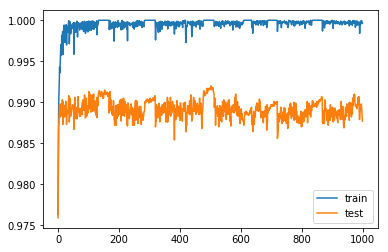

In [53]:
plt.plot(train_accuracy_history, label='train')
plt.plot(test_accuracy_history, label='test', )
plt.legend()

In [61]:
print('эпоха на которой достигается максимальная точность:', 
      test_accuracy_history.index(max(test_accuracy_history)),
      ', со значением:', max(test_accuracy_history))

эпоха на которой достигается максимальная точность: 502 , со значением: tensor(0.9920)
